In [108]:
import numpy as np
import numpy.linalg as la
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [70]:
data = np.random.randn(30).reshape(-1, 3)
stds = np.array([6, 10, 2])
means = np.array([104, 52, 20])
du = data * stds + means

In [71]:
du

array([[106.33961251,  57.19159987,  20.54263502],
       [100.91789008,  57.20769026,  18.81691721],
       [107.30883851,  51.08598363,  19.2997037 ],
       [102.16204917,  57.59535257,  19.37148792],
       [ 98.6411562 ,  72.58150687,  20.86846469],
       [ 90.80638254,  64.36367229,  22.81264433],
       [ 99.82876911,  59.50852452,  16.99452295],
       [112.81578512,  58.65128748,  19.90478748],
       [109.39080672,  58.61634957,  17.21099551],
       [105.09485486,  43.7108809 ,  24.67325945]])

Add some bad rows to the data

In [72]:
bad_q = np.array([
    [120, 38, 17]
])

In [73]:
bad_t = np.array([
    [130, 73, 27]
])

In [74]:
bd = np.vstack([du, bad_q, bad_t])

In [75]:
model = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA())
])
model.fit(bd)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

In [76]:
pca.explained_variance_

array([1.45665791, 1.30936347, 0.56731196])

In [77]:
u, s, vt = la.svd(data)

In [78]:
s

array([3.82887979, 3.52611313, 2.01735804])

In [79]:
s / np.sum(s)

array([0.40852928, 0.37622504, 0.21524568])

In [80]:
pca.explained_variance_ratio_

array([0.43699737, 0.39280904, 0.17019359])

In [81]:
s ** 2 / np.sum(s**2)

array([0.47043199, 0.39897517, 0.13059284])

In [82]:
s ** 2 / pca.explained_variance_

array([10.06435373,  9.49581543,  7.17371352])

In [83]:
u[:, :3] * s 

array([[ 0.06032202, -0.04920172, -0.69937855],
       [ 0.02474458, -0.91973219,  0.19614859],
       [-0.63348681,  0.08248823, -0.1642276 ],
       [ 0.09918835, -0.70116949, -0.06476627],
       [ 1.36374356, -1.55535552, -0.97124399],
       [ 2.73138471, -0.93653149,  0.06413196],
       [-0.46433037, -1.68753127,  0.49188231],
       [-0.84052873,  0.0977899 , -1.37384366],
       [-1.44444634, -0.91758707, -0.51112662],
       [ 1.38425076,  2.02266904, -0.41580119]])

In [84]:
pca.transform(data)

array([[ 0.35114213, -0.60398238, -0.08422827],
       [-0.00952751,  0.01302391,  0.94060272],
       [-0.50936186, -0.3980109 , -0.1312188 ],
       [ 0.15552223, -0.14619795,  0.67831456],
       [ 1.72864936, -0.57495276,  1.37965317],
       [ 2.49858902,  1.03668139,  1.01193437],
       [-0.53465446, -0.07446147,  1.73606244],
       [-0.18959728, -1.55551495, -0.38460877],
       [-1.0433526 , -1.23479514,  0.75916928],
       [ 1.31759202,  0.59317491, -2.02294974]])

In [85]:
np.mean(data, axis=0)

array([-0.11156425,  0.60512848,  0.02477091])

In [86]:
scale = StandardScaler().fit(du)

In [87]:
ds = scale.transform(du)

In [88]:
u, s, vt = la.svd(ds)

In [89]:
pca = PCA().fit(ds)

In [90]:
pca.explained_variance_

array([1.62767844, 1.32273102, 0.38292388])

In [91]:
s**2 / pca.explained_variance_

array([9., 9., 9.])

In [92]:
u[:, :3] * s

array([[ 0.43188447,  0.10229913, -0.35036996],
       [-0.16879349, -0.32442788,  0.59138682],
       [ 1.17978544, -0.08834761,  0.33676796],
       [-0.07422021, -0.18624277,  0.30780244],
       [-1.99192896, -0.2743606 , -0.92596868],
       [-2.23757672,  1.30819542,  0.19526605],
       [-0.45412206, -1.116704  ,  0.8982976 ],
       [ 1.10834965, -0.52815972, -1.02599614],
       [ 0.79274548, -1.42352156, -0.08479489],
       [ 1.41387639,  2.5312696 ,  0.0576088 ]])

In [93]:
pca.transform(ds)

array([[-0.43188447,  0.10229913,  0.35036996],
       [ 0.16879349, -0.32442788, -0.59138682],
       [-1.17978544, -0.08834761, -0.33676796],
       [ 0.07422021, -0.18624277, -0.30780244],
       [ 1.99192896, -0.2743606 ,  0.92596868],
       [ 2.23757672,  1.30819542, -0.19526605],
       [ 0.45412206, -1.116704  , -0.8982976 ],
       [-1.10834965, -0.52815972,  1.02599614],
       [-0.79274548, -1.42352156,  0.08479489],
       [-1.41387639,  2.5312696 , -0.0576088 ]])

In [94]:
t2 = [d @ np.diag(pca.explained_variance_) @ d.T for d in pca.transform(ds)]

In [95]:
t2

[0.36445133343636477,
 0.31951975885660855,
 2.319308051332997,
 0.0911261334897685,
 6.886164257954029,
 10.427667914333238,
 2.2941494110268312,
 2.771574699799383,
 3.7060604754324875,
 11.730244175426183]

In [96]:
def t2(data, pca):
    l = np.diag(pca.explained_variance_)
    t = pca.transform(data)
    return np.array([tt @ l @ tt.T for tt in t])

In [97]:
t2(ds, pca)

array([ 0.36445133,  0.31951976,  2.31930805,  0.09112613,  6.88616426,
       10.42766791,  2.29414941,  2.7715747 ,  3.70606048, 11.73024418])

In [98]:
pca.components_

array([[-0.72677047,  0.68185602,  0.08292793],
       [-0.27430417, -0.39879754,  0.875053  ],
       [ 0.62973161,  0.6132152 ,  0.47687023]])

In [99]:
pp = pca.components_
pp @ pp.T

array([[ 1.00000000e+00,  4.84290503e-17, -7.19240871e-17],
       [ 4.84290503e-17,  1.00000000e+00,  6.60674706e-17],
       [-7.19240871e-17,  6.60674706e-17,  1.00000000e+00]])

In [100]:
def q(data, pca):
    # Get dimensionality of the data
    i = data.shape[1]
    
    pp = pca.components_ @ pca.components_.T
    
    return np.array([x @ (np.eye(i) - pp) @ x.T for x in data])

In [101]:
q(ds, pca)

array([-3.14490571e-17, -1.76441670e-17, -1.11898506e-16, -3.77909992e-18,
       -1.22973674e-16, -1.32586713e-15,  8.73881380e-17, -5.93107907e-16,
       -4.12036911e-16,  6.76163306e-16])

In [102]:
t2(scale.transform(bd), pca)

array([ 0.36445133,  0.31951976,  2.31930805,  0.09112613,  6.88616426,
       10.42766791,  2.29414941,  2.7715747 ,  3.70606048, 11.73024418,
       28.01391708, 16.60245223])

In [103]:
q(scale.transform(bd), pca)

array([-3.14490571e-17, -1.76441670e-17, -1.11898506e-16, -3.77909992e-18,
       -1.22973674e-16, -1.32586713e-15,  8.73881380e-17, -5.93107907e-16,
       -4.12036911e-16,  6.76163306e-16, -2.04247061e-15, -4.23621479e-15])

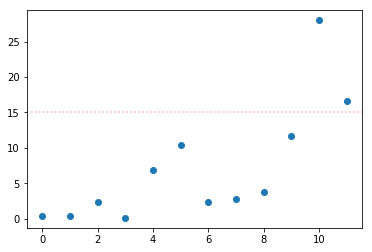

In [118]:
plt.plot(t2(scale.transform(bd), pca), 'o')
plt.axhline(y=15, color='r', linestyle=':', alpha=0.3)

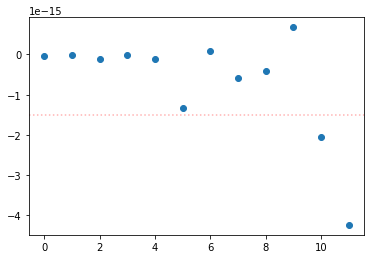

In [119]:
plt.plot(q(scale.transform(bd), pca),'o')
plt.axhline(y=-1.5e-15, color='r', linestyle=':', alpha=0.3)